# Adaptive HulC for Trend Filtering
Confidence intervals in non-parametric regression function estimation is considered a difficult problem requiring certain undersmoothing of classical estimators. The traditional estimators such as Nadaraya--Watson, $k$-NN, RKHS, and splines are minimax optimal in the H{\"o}lder and Sobolev smoothness classes. They are well-known to be minimax {\em sub}-optimal for total variation or Besov spaces. For these larger classes, wavelets, variable bandwidth kernels, locally adaptive splines, and trend filtering estimators are known to be minimax optimal. See, for example, [Guntuboyina et al. (2020)](https://arxiv.org/abs/1702.05113), [Tibshirani (2014)](https://projecteuclid.org/journals/annals-of-statistics/volume-42/issue-1/Adaptive-piecewise-polynomial-estimation-via-trend-filtering/10.1214/13-AOS1189.full), [Cai and Zhou (2009)](https://projecteuclid.org/journals/annals-of-statistics/volume-37/issue-2/A-data-driven-block-thresholding-approach-to-wavelet-estimation/10.1214/07-AOS538.full), and [Mammen and van de Geer (1997)](https://projecteuclid.org/journals/annals-of-statistics/volume-25/issue-1/Locally-adaptive-regression-splines/10.1214/aos/1034276635.full). Wavelets and trend filtering estimators are also spatially adaptive attaining faster local rates. Pointwise confidence intervals are not well-understood from either of these estimators. Furthermore, the pointwise asymptotic distribution of trend filtering estimator is unknown even in the univariate case. In the following, we will explore the median bias of trend filtering estimators in some examples and consider the coverage of adaptive HulC.
## Median bias of Trend Filtering Estimator
We use trend filtering with cross-validated choice of the tuning (penalty) parameter and compute the median bias based on multiple replications. 
### Setting 1: piecewise constant function
Suppose $(X_i, Y_i), 1\le i\le n$ are independent and identically distributed observations from the model
\begin{equation*}
Y_i = f_0(X_i) + \xi_i,\quad\mbox{where}\quad X_i\sim\mathrm{Unif}[0, 1], \quad \xi_i\sim N(0, 1),
\end{equation*}
and
\begin{equation*}
f_0(x) = \mathbf{1}\{0.2 \le x < 0.3\} + 5\mathbf{1}\{0.5 \le x < 0.7\}
\end{equation*}

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


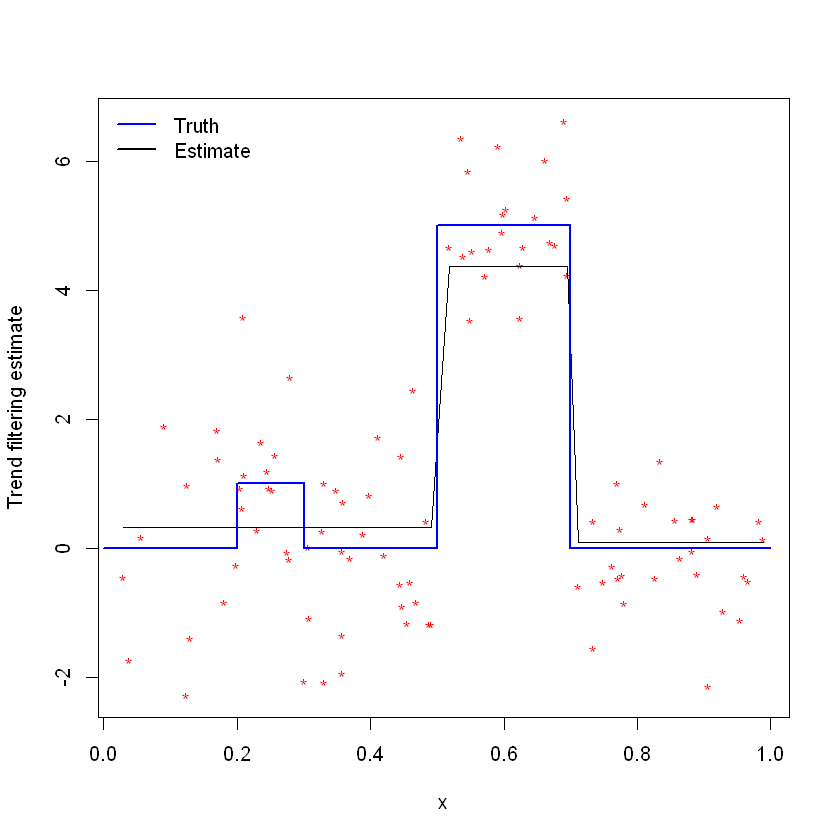

In [18]:
suppressMessages(library("genlasso"))
## one replication
set.seed(100)
f0 <- function(x){
    ((0.3 - x)*(x - 0.2) >= 0) + 5*((0.7 - x)*(x - 0.5) >= 0)
}
n <- 100
x <- sort(runif(n))
y <- f0(x) + rnorm(n)
out <- trendfilter(y, pos = x, ord=0)
cv <- cv.trendfilter(out)
# plot(x, y, pch = '*', col = "gray")
plot(out, lambda=cv$lambda.1se, col = "red", xlab = "x", lwd = 2, pch = "*")
lines(seq(0, 1, len = 10000), f0(seq(0, 1, len = 10000)), type = 's', col = "blue", lwd = 2)
legend("topleft", c("Truth", "Estimate"), col=c("blue", "black"), lwd = c(2, 2), bty = 'n')

The plot above shows one replication of 100 data points from the model, the true function $f_0$ in blue, and the trend filtering estimate with cross-validated penalty parameter in black. 

In [20]:
## For our purposes, we define a function that returns the
## the trend filtering estimate with cross-validated tuning
## parameter
trend_filter_cv <- function(x, y, order = k){
    A <- cbind(x, y)
    A <- A[order(A[,1]),]
    x <- A[,1]
    y <- A[,2]
    out <- trendfilter(y, pos = x, ord=order)
    cv <- cv.trendfilter(out)
    fit <- out$fit[,paste0(round(cv$lambda.1se, digits = 3))]
    if(order == 0){
        predict <- function(newdata){
            approxfun(x, y = fit, method = "constant", rule = 2, f = 0, ties = mean)(newdata)
        }
    } else {
        predict <- function(newdata){
            approxfun(x, y = fit, method = "linear", rule = 2, f = 0, ties = mean)(newdata)
        }
    }
    return(list(x = x, y = y, fit = fit, predict = predict))
}

In the following, we perform multiple replications in order to estimate the finite sample median bias of the trend filtering estimator at several points in the domain.

In [25]:
set.seed(2021)
f0 <- function(x){
    ((0.3 - x)*(x - 0.2) >= 0) + 5*((0.7 - x)*(x - 0.5) >= 0)
}
nsamp_seq <- c(100, 500, 1000)
xgrid <- seq(0.01, 0.99, length = 50)
true_fun_val <- f0(xgrid)
nrep <- 1000
final_grid <- expand.grid(nsamp_seq, 1:nrep)
colnames(final_grid) <- c("nsamp_seq", "rep")
median_bias_grid <- data.frame(nsamp = 0, x = -1, est_diff = 0, rep = -1)
for(idx in 1:nrow(final_grid)){
    n <- final_grid$nsamp_seq[idx]
    x <- sort(runif(n))
    y <- f0(x) + rnorm(n)
    trend_pred <- trend_filter_cv(x, y, order = 0)$predict(xgrid)
    tmp <- cbind(n, xgrid, trend_pred - true_fun_val, final_grid$rep[idx])
    colnames(tmp) <- c("nsamp", "x", "est_diff", "rep")
    median_bias_grid <- rbind(median_bias_grid, tmp)
}

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold

nsamp,x,med_bias
100,0.01,0.303
100,0.03,0.302
100,0.05,0.299
100,0.07,0.306
100,0.09,0.315
100,0.11,0.327


nsamp,x,est_diff,rep
0,-1.00,0.00000000,-1
100,0.01,0.05565235,1
100,0.03,0.05565235,1
100,0.05,0.05565235,1
100,0.07,0.05565235,1
100,0.09,0.05565235,1


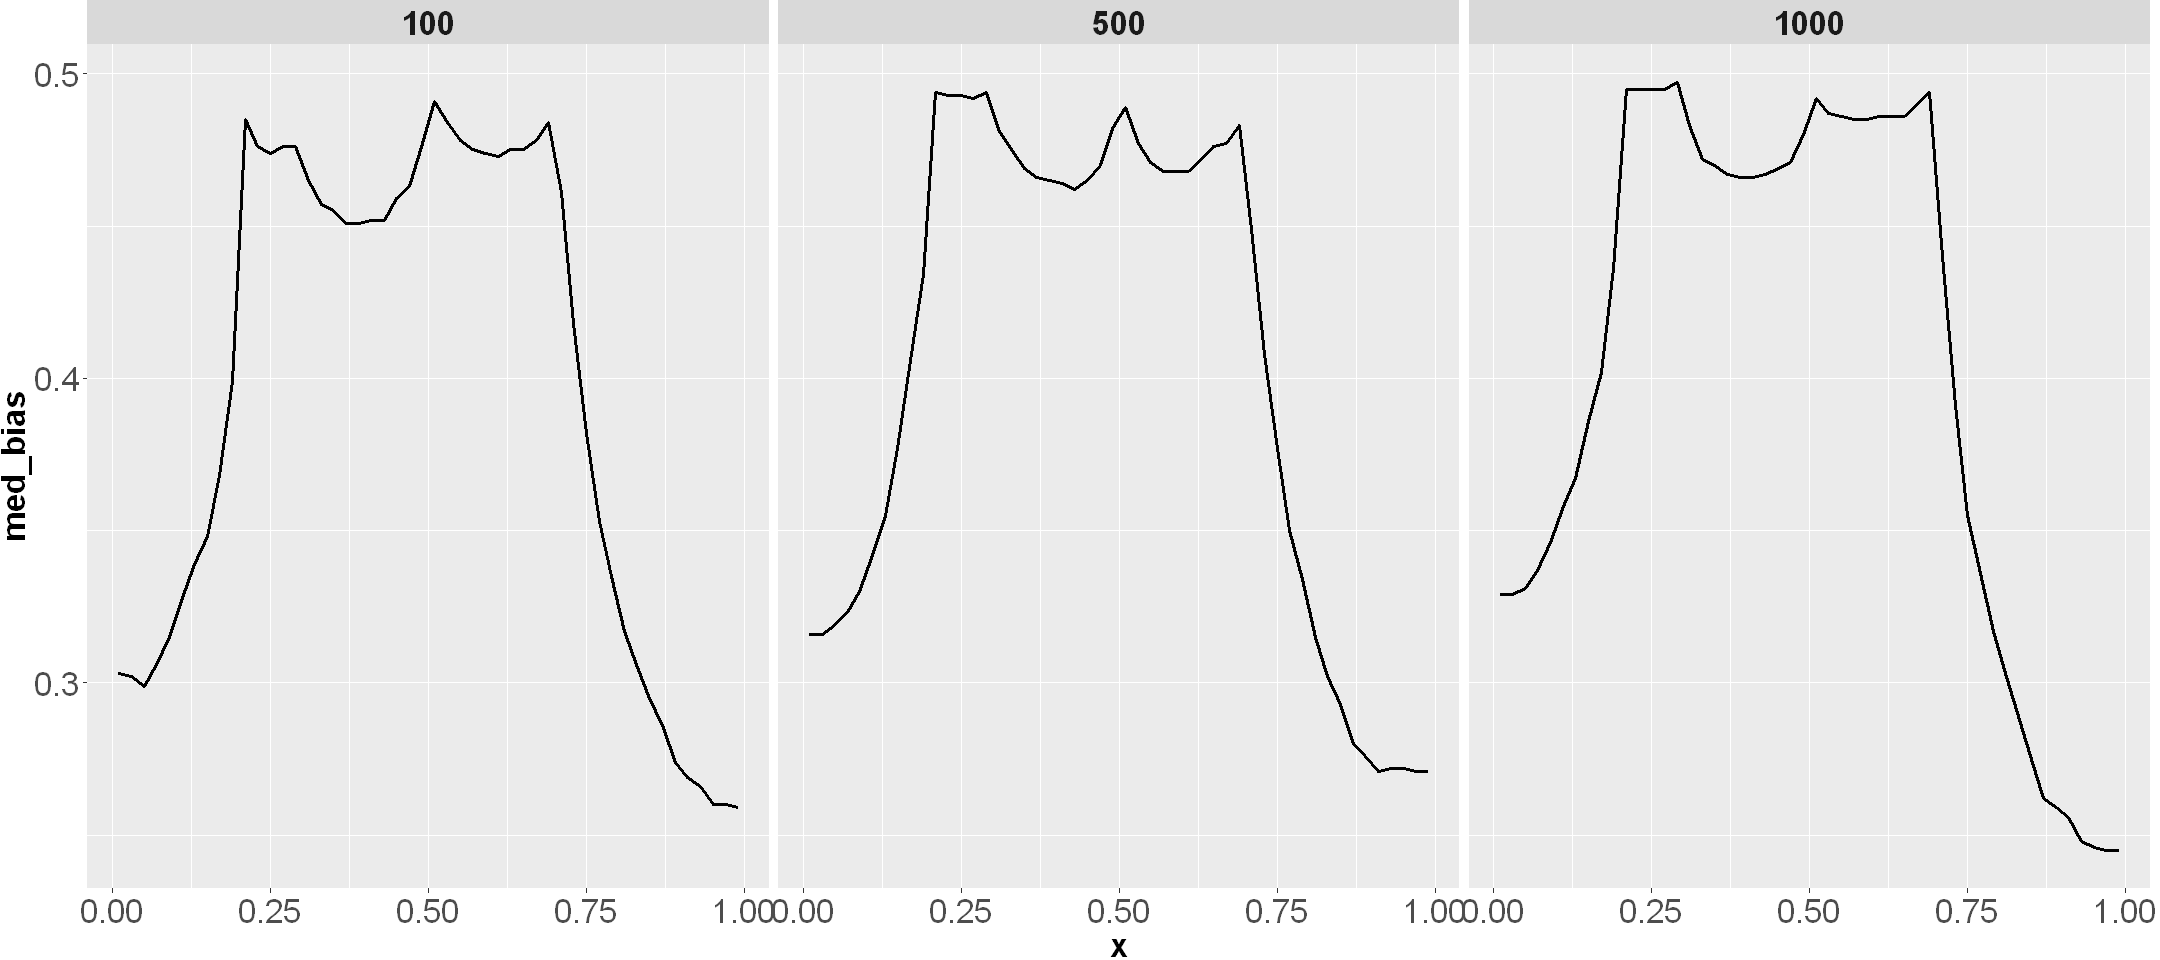

In [32]:
suppressMessages(library("tidyverse"))
library("repr")
median_bias <- median_bias_grid[-1,] %>% group_by(nsamp, x) %>% summarize(med_bias = abs(mean(est_diff <= 0) - 1/2))
head(median_bias)
head(median_bias_grid)
options(repr.plot.width=18, repr.plot.height=8)
ggplot(median_bias, aes(x = x, y = med_bias)) +
    geom_line(size = 1.01) + 
    facet_wrap(~nsamp) + 
    theme(
        axis.text.x=element_text(size = 20),
        axis.text.y=element_text(size=20),
        axis.title=element_text(size=20,face="bold"),
        strip.text = element_text(size=20,face = "bold"),
        plot.margin = unit(c(0,0.2,0,0), "cm"),
        plot.title=element_text(size=20),
        axis.text=element_text(size=12)
    )

The plots show the median bias of the trend filtering estimator for several points in the support as the sample size increases. We notice that the median bias in general is significantly higher more than $0.3$ at most points. It is also interesting to note that the median bias locally peaks at the change points. 

We will now explore the performance of adaptive HulC with the trend filtering estimator. We stress here that no pointwise limiting theory exists for trend filtering estimator (even with a fixed tuning parameter) and for this reason, we cannot claim the asymptotic validity of adaptive HulC with this estimator. 

In [ ]:
source("HulC.R")
set.seed(2021)
f0 <- function(x){
    ((0.3 - x)*(x - 0.2) >= 0) + 5*((0.7 - x)*(x - 0.5) >= 0)
}
nsamp_seq <- c(100, 500)
xgrid <- seq(0.01, 0.99, length = 25)
nrep <- 500
alpha <- 0.05
final_grid <- expand.grid(nsamp_seq, x, 1:nrep)
colnames(final_grid) <- c("nsamp_seq", "x", "rep")
adaptive_hulc_final_grid <- data.frame(ci_lwr = -1e05, ci_upr = 1e05, med_bias = 0, nsamp = 0, x = -1, rep = -1)
for(idx in 1:nrow(final_grid)){
    n <- final_grid$nsamp_seq[idx]
    x <- sort(runif(n))
    y <- f0(x) + rnorm(n)
    estimate <- function(dat){
        trend_filter_cv(dat[,1], dat[,2], order = 0)$predict(final_grid$x[idx])
    }
    ## using the default subsample size of n^{2/3} and 300 subsamples.
    tryCatch(
        tmp <- adaptive_HulC(cbind(x, y), estimate, alpha = alpha, nsub = 300),
        error = function(e){
          tmp <- list(CI = c(NA, NA), median.bias = NA)
        }
    )
    adaptive_hulc_final_grid[idx, 1:2] <- tmp$CI
    adaptive_hulc_final_grid[idx, 3] <- tmp$median.bias
}

In [ ]:
library("tidyverse")
width_cov_mat <- adaptive_hulc_final_grid %>% mutate(width = ci_upr - ci_lwr, 
                                                     coverage = ((ci_upr - f0(x))*(f0(x) - ci_lwr) >= 0))
head(width_cov_mat)
average_width_cov <- width_cov_mat %>% 
                        group_by(nsamp, x) %>% 
                        summarize(ave_width = mean(width, na.rm = TRUE), 
                                  emp_cov = mean(coverage, na.rm = TRUE),
                                 ave_med_bias = mean(med_bias, na.rm = TRUE))
head(average_width_cov)

In [ ]:
g1 <- ggplot(average_width_cov, aes(x = x, y = emp_cov, group = as.factor(nsamp), color = as.factor(nsamp))) +
        geom_line(size = 1.01) +
        ylim(0.75, 1) +
        geom_hline(yintercept = 0.95, color = "gray30", linetype = "dashed", size = 1.01) +
        ggtitle("Empirical Coverage") + 
        theme(
            axis.text.x=element_text(size = 20),
            axis.text.y=element_text(size=20),
            axis.title=element_text(size=20,face="bold"),
            strip.text = element_text(size=20,face = "bold"),
            plot.margin = unit(c(0,0.2,0,0), "cm"),
            plot.title=element_text(size=20),
            axis.text=element_text(size=12)
        )
g2 <- ggplot(average_width_cov, aes(x = x, y = ave_width, group = as.factor(nsamp), color = as.factor(nsamp))) +
        geom_line(size = 1.01) +
        ggtitle("Average Width") + 
        theme(
            axis.text.x=element_text(size = 20),
            axis.text.y=element_text(size=20),
            axis.title=element_text(size=20,face="bold"),
            strip.text = element_text(size=20,face = "bold"),
            plot.margin = unit(c(0,0.2,0,0), "cm"),
            plot.title=element_text(size=20),
            axis.text=element_text(size=12)
        )
g3 <- ggplot(average_width_cov, aes(x = x, y = ave_med_bias, group = as.factor(nsamp), color = as.factor(nsamp))) +
        geom_line(size = 1.01) +
        ggtitle("Estimated Median Bias") + 
        theme(
            axis.text.x=element_text(size = 20),
            axis.text.y=element_text(size=20),
            axis.title=element_text(size=20,face="bold"),
            strip.text = element_text(size=20,face = "bold"),
            plot.margin = unit(c(0,0.2,0,0), "cm"),
            plot.title=element_text(size=20),
            axis.text=element_text(size=12)
        )
options(repr.plot.width=14, repr.plot.height=10)
library("gridExtra")
grid.arrange(g1,g2,g3, ncol = 2)